In [5]:
from alphaengine import loaders, stats, transforms
import numpy as np
import talib as ta
from itertools import product
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
aapl = loaders.FileInstrument('../data/aapl.csv')

In [7]:
ema = ta.EMA(aapl['close'])

In [23]:
momentum = np.diff(ema, n=10, prepend=np.ones(10) * ema[0])

In [34]:
z_mom = transforms.z_score(momentum, window_size=50)

In [35]:
strats = transforms.generate_strategies(z_mom)

In [36]:
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

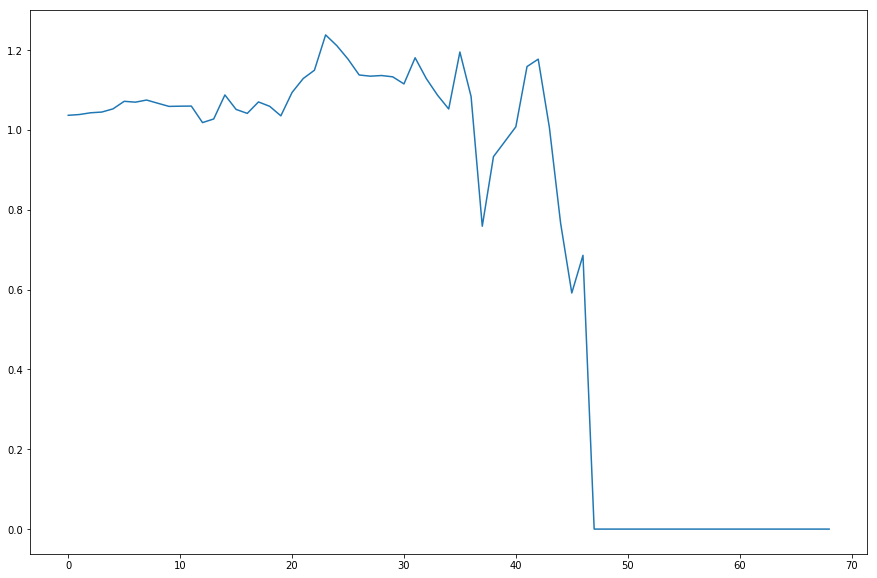

In [37]:
plt.plot(v)

In [30]:
z_close = transforms.z_score(aapl['close'], window_size=100)

In [31]:
strats = transforms.generate_strategies(z_close)

In [32]:
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

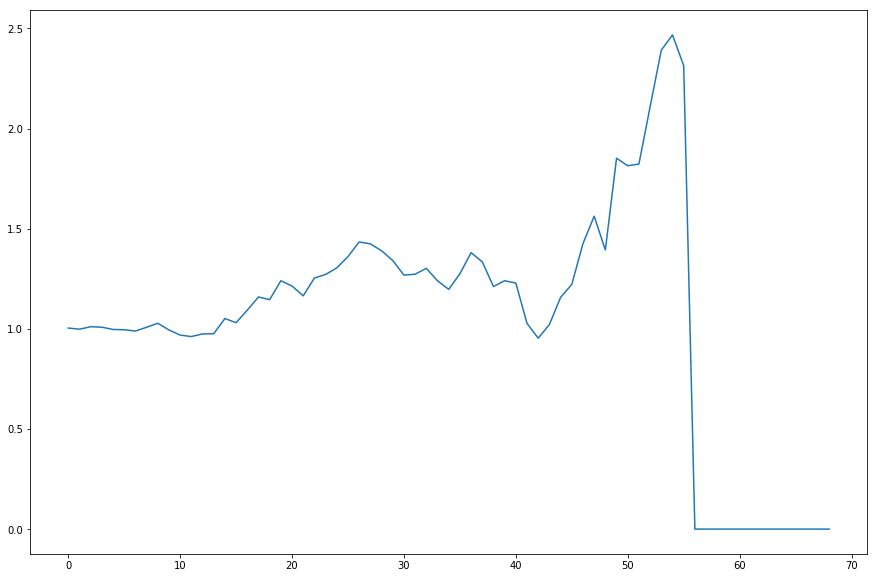

In [33]:
plt.plot(v)

In [40]:
best_strat = strats[np.argmax(v)]

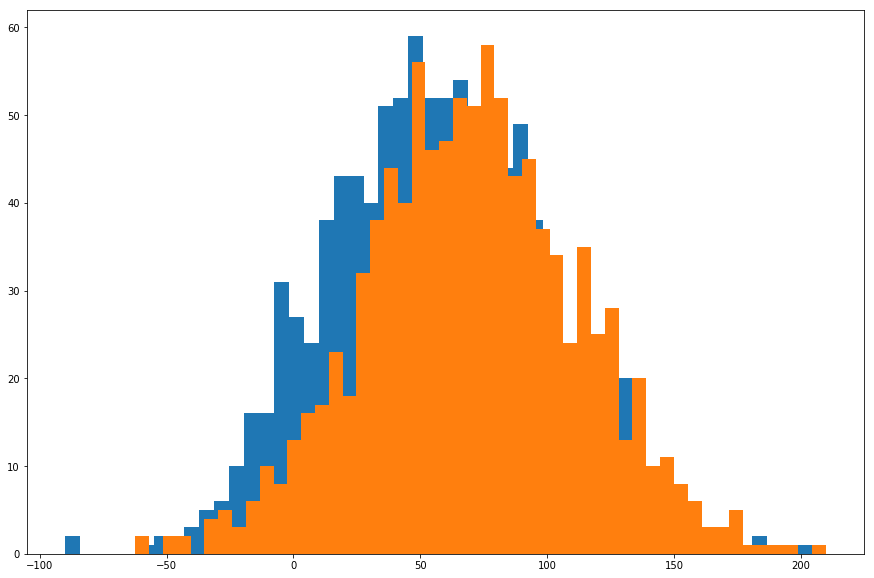

In [41]:
stats.plot_strat_monte_carlo(aapl, best_strat)

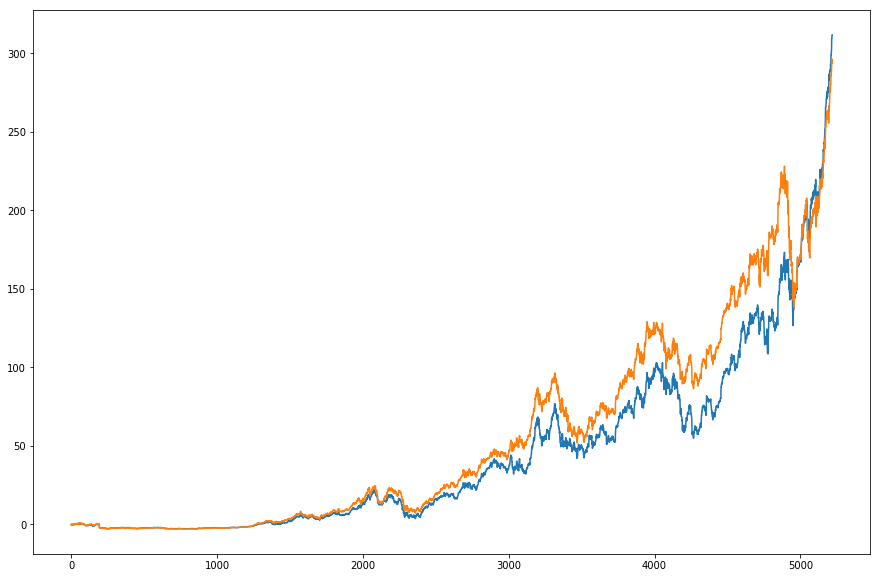

In [44]:
performance = best_strat.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))